# ROC comparison

In [ ]:
def preds(model, feats, bkg_test, signal_test):
    X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
    X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))
    model = tf.keras.models.load_model("cnn_towerem_WandB")
    bkg_preds1 = model.predict(X_test_B).flatten()
    sig_preds1 = model.predict(X_test_S).flatten()    

In [125]:
feats = ["PT_tower_em", "Eta_tower_em", "Phi_tower_em"]
X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))
model = tf.keras.models.load_model("cnn_towerem_WandB")
bkg_preds1 = model.predict(X_test_B).flatten()
sig_preds1 = model.predict(X_test_S).flatten()

feats = ["PT_tower_had", "Eta_tower_had", "Phi_tower_had"]
X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))
model = tf.keras.models.load_model("cnn_towerhad_WandB")
bkg_preds2 = model.predict(X_test_B).flatten()
sig_preds2 = model.predict(X_test_S).flatten()

feats = ["PT_track", "Eta_track", "Phi_track","D0_track", "DZ_track"]
X_test_B = np.concatenate(np.array(bkg_j_test.copy()[feats]).flatten()).reshape(len(bkg_j_test), n_constits, len(feats))
X_test_S = np.concatenate(np.array(sig_j_test.copy()[feats]).flatten()).reshape(len(sig_j_test), n_constits, len(feats))
model = tf.keras.models.load_model("cnn_track_WandB")
bkg_preds3 = model.predict(X_test_B).flatten()
sig_preds3 = model.predict(X_test_S).flatten()

feats = ["mult_track", "mult_tower_had","mult_tower_em", "Eta", "maxD0", "maxDZ", "avgDeltaR"]
params = {'objective':'binary:logistic', 'n_estimators':500}
xgb_model= XGBClassifier(**params)
xgb_model.load_model("tree_WandB.txt")
bkg_preds4 = xgb_model.predict_proba(bkg_j_test[feats])[:,1]
sig_preds4 = xgb_model.predict_proba(sig_j_test[feats])[:,1]

bkg_preds_test = np.array([bkg_preds1, bkg_preds2, bkg_preds3, bkg_preds4]).transpose()
sig_preds_test = np.array([sig_preds1, sig_preds2, sig_preds3, sig_preds4]).transpose()

In [152]:
print(np.corrcoef(sig_preds1,sig_preds2)[0,1])
print(np.corrcoef(sig_preds2,sig_preds4)[0,1])
print(np.corrcoef(sig_preds1,sig_preds3)[0,1])

print(np.corrcoef(bkg_preds3,bkg_preds4)[0,1])
print(np.corrcoef(bkg_preds2,bkg_preds4)[0,1])
print(np.corrcoef(bkg_preds1,bkg_preds4)[0,1])

0.5004379653174927
0.747333491765402
0.4472388467915693
0.5714064973619644
0.7455193132029205
0.6173110119210615


In [126]:
data = pd.concat([sig_j,bkg_j]).sample(frac=1).reset_index()
train_ind = np.arange(0,int(len(data)*(1-val_frac))) 
val_ind = np.arange(int(len(data)*(1-val_frac)),len(data))

feats = ["PT_tower_em", "Eta_tower_em", "Phi_tower_em"]
model = tf.keras.models.load_model("cnn_towerem_WandB")
X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats]).flatten()).reshape(len(train_ind), n_constits, len(feats))
y_train = data.iloc[train_ind]["label"]
X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats]).flatten()).reshape(len(val_ind), n_constits, len(feats))
y_val = data.loc[val_ind]["label"]
preds1_train = model.predict(X_train).flatten()
preds1_val = model.predict(X_val).flatten()

feats = ["PT_tower_had", "Eta_tower_had", "Phi_tower_had"]
model = tf.keras.models.load_model("cnn_towerhad_WandB")
X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats]).flatten()).reshape(len(train_ind), n_constits, len(feats))
y_train = data.iloc[train_ind]["label"]
X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats]).flatten()).reshape(len(val_ind), n_constits, len(feats))
y_val = data.loc[val_ind]["label"]
preds2_train = model.predict(X_train).flatten()
preds2_val = model.predict(X_val).flatten()

feats = ["PT_track", "Eta_track", "Phi_track","D0_track", "DZ_track"]
model = tf.keras.models.load_model("cnn_track_WandB")
X_train = np.concatenate(np.array(data.copy().iloc[train_ind][feats]).flatten()).reshape(len(train_ind), n_constits, len(feats))
y_train = data.iloc[train_ind]["label"]
X_val =np.concatenate(np.array(data.copy().iloc[val_ind][feats]).flatten()).reshape(len(val_ind), n_constits, len(feats))
y_val = data.loc[val_ind]["label"]
preds3_train = model.predict(X_train).flatten()
preds3_val = model.predict(X_val).flatten()

feats = ["mult_track", "mult_tower_had","mult_tower_em", "Eta", "maxD0", "maxDZ", "avgDeltaR"]
params = {'objective':'binary:logistic', 'n_estimators':500}
xgb_model= XGBClassifier(**params)
xgb_model.load_model("tree_WandB.txt")
preds4_train = xgb_model.predict_proba(data.iloc[train_ind][feats])[:,1]
preds4_val = xgb_model.predict_proba(data.iloc[val_ind][feats])[:,1]

X_train = np.array([preds1_train, preds2_train, preds3_train, preds4_train]).transpose()
y_train = data.iloc[train_ind]["label"]
X_val = np.array([preds1_val, preds2_val, preds3_val, preds4_val]).transpose()
y_ = data.iloc[val_ind]["label"]

In [109]:
X_train.shape

(41062, 4)

In [110]:
y_train.shape

(10266,)

In [65]:
bkg_preds.shape

(4, 28677)

In [66]:
bkg_preds = np.transpose(bkg_preds)
sig_preds = np.transpose(sig_preds)
bkg_best = []
for row in bkg_preds:
    bkg_best.append(row[np.argmax(np.abs(0.5-row))])
bkg_preds = np.array(bkg_best)    
sig_best = []    
for row in sig_preds:
    sig_best.append(row[np.argmax(np.abs(0.5-row))])    
sig_preds = np.array(sig_best)    

In [73]:
%%time
thresh = 0.985

bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)

print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

sig_eff=0.5013107937081902
bkg_eff=0.006241936046308889
Wall time: 168 ms


In [100]:
%%time
thresh = 0.955
bkg_best = []
for row in bkg_preds:
    bkg_best.append(np.sum(row>thresh)>=2)
sig_best = []    
for row in sig_preds:
    sig_best.append(np.sum(row>thresh)>=2)    
sig_eff = np.sum(sig_best)/len(sig_best)  
bkg_eff = np.sum(bkg_best)/len(bkg_best)  
print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

sig_eff=0.4994576026035075
bkg_eff=0.006346549499598982
Wall time: 406 ms


In [127]:
params = {'objective':'binary:logistic', 'n_estimators':500}
xgb_merge= XGBClassifier(**params)
xgb_merge.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)] , early_stopping_rounds=15,verbose=True)

[0]	validation_0-error:0.07610	validation_1-error:0.07374
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 15 rounds.
[1]	validation_0-error:0.07501	validation_1-error:0.07384
[2]	validation_0-error:0.07416	validation_1-error:0.07403
[3]	validation_0-error:0.07377	validation_1-error:0.07354
[4]	validation_0-error:0.07362	validation_1-error:0.07247
[5]	validation_0-error:0.07362	validation_1-error:0.07247
[6]	validation_0-error:0.07355	validation_1-error:0.07228
[7]	validation_0-error:0.07347	validation_1-error:0.07218
[8]	validation_0-error:0.07357	validation_1-error:0.07257
[9]	validation_0-error:0.07365	validation_1-error:0.07237
[10]	validation_0-error:0.07369	validation_1-error:0.07237
[11]	validation_0-error:0.07345	validation_1-error:0.07218
[12]	validation_0-error:0.07338	validation_1-error:0.07237
[13]	validation_0-error:0.07338	validation_1-error:0.07228
[14]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

sig_eff=0.5089947568251673
bkg_eff=0.004742476549150888


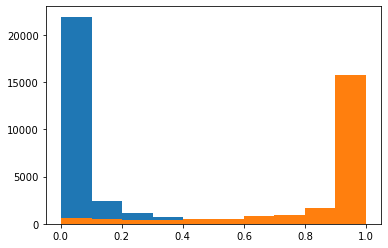

In [131]:
xgb_model = xgb_merge
thresh = 0.976

bkg_preds = xgb_model.predict_proba(bkg_preds_test)[:,1]
sig_preds = xgb_model.predict_proba(sig_preds_test)[:,1]
bkg_eff = sum(bkg_preds>thresh)/len(bkg_preds)
sig_eff = sum(sig_preds>thresh)/len(sig_preds)
print("sig_eff={}".format(sig_eff))
print("bkg_eff={}".format(bkg_eff))

plt.hist(bkg_preds, bins=10);
plt.hist(sig_preds, bins=10);